In [1]:
"""Explanation video link- https://drive.google.com/file/d/1Xc7E5EcbUsgbgGMBhoSv59yAApL0UU17/view?usp=sharing"""

'Explanation video link- https://drive.google.com/file/d/1Xc7E5EcbUsgbgGMBhoSv59yAApL0UU17/view?usp=sharing'

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
data = pd.read_csv('Imdbs.csv')#here I load the dataset

#  1. Data Exploration and Preprocessing

 Analyze the dataset for trends, missing values, and outliers.

In [12]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review            50000 non-null  object
 1   sentiment         50000 non-null  object
 2   processed_review  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB
None


In [13]:
print(data['sentiment'].value_counts()) #here i count the distribution of data into negative and positive value

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [14]:
#here I print the missing values if they exixt
print(data.isnull().sum())

review              0
sentiment           0
processed_review    0
dtype: int64


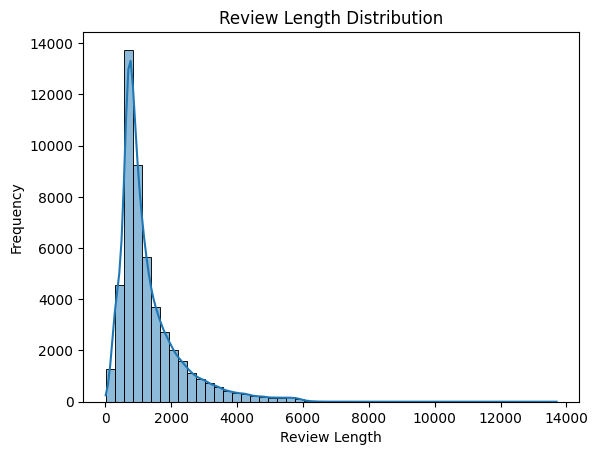

In [15]:
#here I am goinf to analyze review lengths using histogram
data['review_length'] = data['review'].apply(len)
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

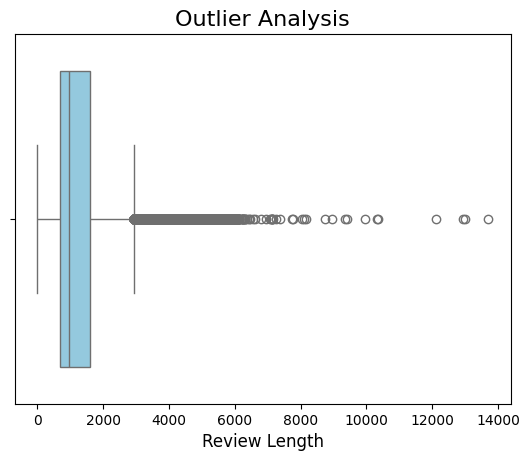

In [16]:
#here i plot a boxplot to analyze outliers
sns.boxplot(x=data['review_length'], color='skyblue')
plt.title('Outlier Analysis', fontsize=16)
plt.xlabel('Review Length', fontsize=12)
plt.show()

In [17]:
"""I abolve analysis i find out that both negative and positive have equal distribution and there is no null value present and analyze length of review and find that some review has ver large length in outliers the dots represent the outliers with long length"""

'I abolve analysis i find out that both negative and positive have equal distribution and there is no null value present and analyze length of review and find that some review has ver large length in outliers the dots represent the outliers with long length'

Perform data cleaning and text preprocessing.

In [3]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [19]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  #here i convert text to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  #here i remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]  #here i remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  #here i lemmatize words
    return ' '.join(tokens) #here i entered space between tokens

#here I am going to apply the preprocessing by using preprocess_text method
data['processed_review'] = data['review'].apply(preprocess_text)


 Feature extraction using techniques like TF-IDF, Word2Vec, or embeddings.

In [20]:
vectorizer = TfidfVectorizer(max_features=5000)  #here i put the limit to top 5000 features
X = vectorizer.fit_transform(data['processed_review'])#her i vectorize the data and fit and then transfor it for the model
y = data['sentiment'].map({'positive': 1, 'negative': 0}) 

#  3. Model Development

As dataset is very large so I will use full data for Logistic Regression and Naive Bayes and I will use partial data for SVM and Random Forest model because if i will use full data for SVM or Random Forest it will require a lot of time 

 ● Build and train classification models to predict the sentiment of reviews

For full data Losgistic Regression and Naive Bayes

In [21]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.3, random_state=42)#here i split data training and resting phase

In [22]:
models_full = {#here i create model_full dictonary because i will build these two model as it require same function for plotting and evaluating the model
    'Logistic Regression': LogisticRegression(),#logistic regression for logistic regression model
    'Naive Bayes': MultinomialNB()#naive bayes for navive bayes model
}



 4. Model Evaluation for full data


Logistic Regression model

Logistic Regression model metrics:
Accuracy: 0.886
Precision: 0.880124143282038
Recall: 0.8968243510343918
F1 Scor: 0.8883957707871035


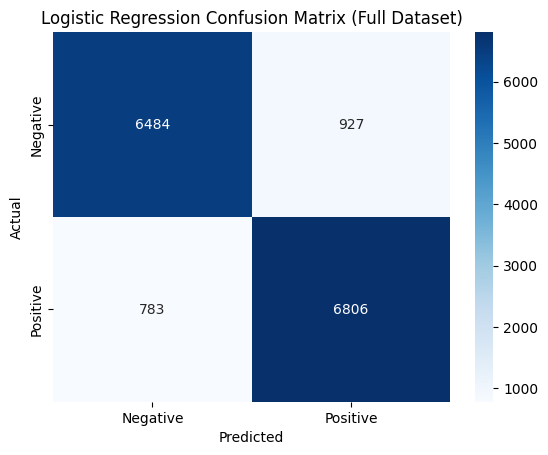


Naive Bayes model

Naive Bayes model metrics:
Accuracy: 0.8522666666666666
Precision: 0.8514061478090255
Recall: 0.8576887600474371
F1 Scor: 0.8545359065248785


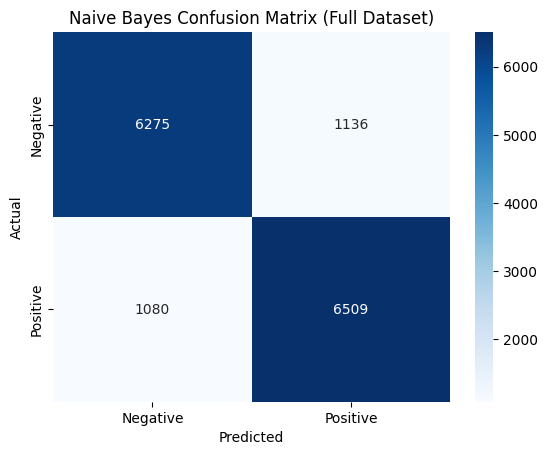

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
for name, model in models_full.items():#this for loop will build and train each model which is used in models_full dictonary
    print(f"\n{name} model")
    model.fit(X_train_full, y_train_full)#here i will fit model for X_train_full and y_train_full
    y_pred_full = model.predict(X_test_full)#here i will make  prediction for model
    
    #here evaluate metrices for model like accuracy, F1socre,precision etc
    print(f"\n{name} model metrics:")
    print("Accuracy:", accuracy_score(y_test_full, y_pred_full))#this help to calculate accuracy
    print("Precision:", precision_score(y_test_full, y_pred_full, average='binary'))#this help to calculate precision
    print("Recall:", recall_score(y_test_full, y_pred_full, average='binary'))#this help to calculate recall
    print("F1 Scor:", f1_score(y_test_full, y_pred_full, average='binary'))#this help to calculate f1 score
    
    #here i calculate confusion matrix and display it in the form of heatmap
    cm_full = confusion_matrix(y_test_full, y_pred_full)
    sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{name} Confusion Matrix (Full Dataset)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



For sample data SVM and Random Forest

In [25]:
# split data for sample data or we can say small part of data
data_sample = data.sample(10000, random_state=42)  # Use a subset of 10,000 rows for efficiency
X_sample = vectorizer.transform(data_sample['processed_review'])
y_sample = data_sample['sentiment'].map({'positive': 1, 'negative': 0})
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

In [26]:
models_sample = {#here i create model_sample dictonary because i will build these two model as it require same function for plotting and evaluating the model
    'SVM': LinearSVC(),#LinearSVC() for SVM
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)#RandomForestClassifier for random forest model
}


 4. Model Evaluation for sample data


 SVM...

SVM model metrics):
Accuracy: 0.8456666666666667
Precision: 0.8342857142857143
Recall: 0.866754617414248
F1 Scor: 0.8502102879327078


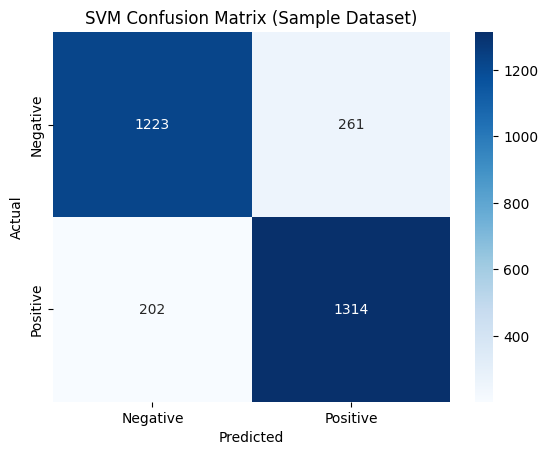


 Random Forest...

Random Forest model metrics):
Accuracy: 0.7956666666666666
Precision: 0.7608318890814558
Recall: 0.8687335092348285
F1 Scor: 0.811210348013551


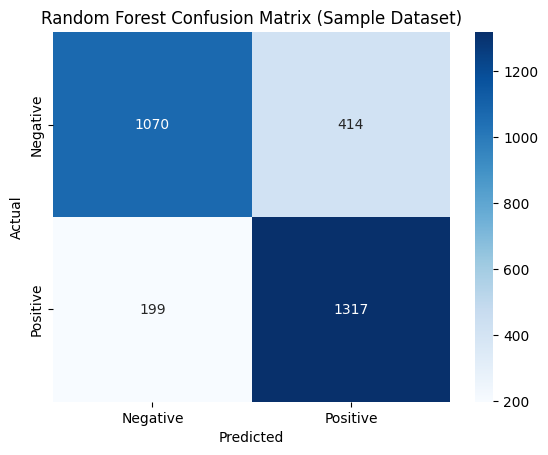

In [27]:
for name, model in models_sample.items():
    print(f"\n {name}...")
    model.fit(X_train_sample, y_train_sample)#here i will fit model for X_train_sample and y_train_sample
    y_pred_sample = model.predict(X_test_sample)#here i will make  prediction for model
    
     #here evaluate metrices for model like accuracy, F1socre,precision etc
    print(f"\n{name} model metrics):")
    print("Accuracy:", accuracy_score(y_test_sample, y_pred_sample))
    print("Precision:", precision_score(y_test_sample, y_pred_sample, average='binary'))#this help to calculate precision
    print("Recall:", recall_score(y_test_sample, y_pred_sample, average='binary'))#this help to calculate recall
    print("F1 Scor:", f1_score(y_test_sample, y_pred_sample, average='binary'))#this help to calculate f1 score
    
    
    #here i calculate confusion matrix and display it in the form of heatmap
    cm_sample = confusion_matrix(y_test_sample, y_pred_sample)
    sns.heatmap(cm_sample, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{name} Confusion Matrix (Sample Dataset)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Now lets make prediction for new review

In [28]:
new_review = ["The movie was too good and worthit."]
new_review_vectorized = vectorizer.transform(new_review)

Here i will make prediction with logistic regression and Naive Bayes

In [31]:
for name, model in models_full.items():
    predicted_sentiment = model.predict(new_review_vectorized)
    sentiment_label = "Positive" if predicted_sentiment[0] == 1 else "Negative"
    print(f"{name} Predicted Sentiment: {sentiment_label}")

Logistic Regression Predicted Sentiment: Positive
Naive Bayes Predicted Sentiment: Negative


Here i will make prediction with SVM and Random Forest

In [32]:
for name, model in models_sample.items():
    predicted_sentiment = model.predict(new_review_vectorized)
    sentiment_label = "Positive" if predicted_sentiment[0] == 1 else "Negative"
    print(f"{name} Predicted Sentiment: {sentiment_label}")

SVM Predicted Sentiment: Positive
Random Forest Predicted Sentiment: Positive


Final Insights or Result of analysis:-

Logistic Regression has the highest accuracy,F1 Score and Precision, Random Forest model has the highest Recall so the Logistic Regression model is best among these 4 models as it has the best metric and except Naive Bayes all mode predict coreect Sentiment for new review which shows that Naive Bayes will be less reliable.

In [2]:
"""Explanation video link- https://drive.google.com/file/d/1Xc7E5EcbUsgbgGMBhoSv59yAApL0UU17/view?usp=sharing"""

'Explanation video link- https://drive.google.com/file/d/1Xc7E5EcbUsgbgGMBhoSv59yAApL0UU17/view?usp=sharing'